## A simple KNN Classifier using Scikit-Learn

### Step 1: Import required Libraries and Modules.

##### First Steps first

#### Matplotlib Magic Function

##### 1. %matplotlib inline 
##### 2. %matplotlib notebook

Both (1) and (2) are used to output the plots in Jupyter notebooks, the major difference is %matplotlib notebook plot is dynamically interactive compared to %matplotlib inline. 

### Step 2: Importing Required Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

### Step 3: Getting the data (Data Collection) and Analysing the Data.

In [2]:
fruits_data = pd.read_table('fruit_data_with_colors.txt')

###### Analysing Data

In [3]:
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


###### As seen above,
The feature set consists of Mass, width, height, color_score of fruit. 

In [4]:
fruits_data.shape

(59, 7)

In [5]:
fruits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
fruits_data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


### Step 4: Exploratory Data Analysis

#### Lets First create the Train, Test Splits.

In [7]:
X = fruits_data[['fruit_subtype', 'mass','width','height','color_score' ]]   # Features
y = fruits_data['fruit_label']                                               # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  # Train, Test Split

#### Lets Plot a scatter plot to see how the Feature's affects the Label.

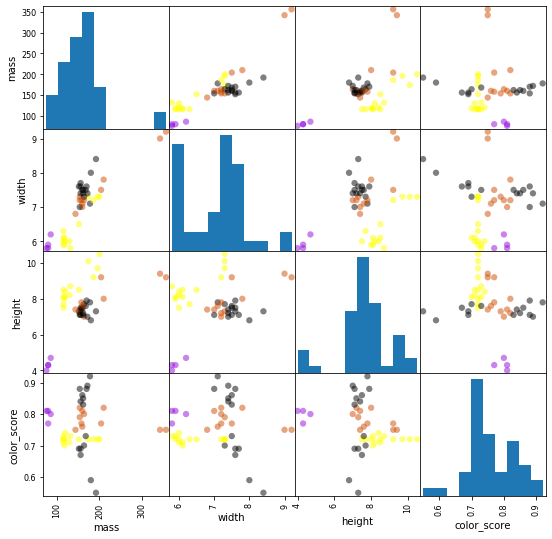

In [8]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker = 'O', s = 40, figsize = (9,9), cmap = cmap)

The relationship between different features can be seen in the above scatter matrix.

Lets try building a 3D Scatter plot to better understand the Situation.

Text(0.5, 0, 'Color Score')

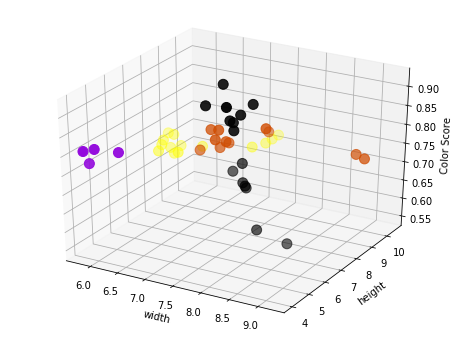

In [9]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs= X_train['width'],ys= X_train['height'],zs= X_train['color_score'], c = y_train, marker = "o", s = 100, cmap = cmap)

ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('Color Score')

Hence, by judging the above plots it can be proved that the feature values are well separated and a Categorical Algorithm like Knn can be helpful here.

### Step 5: Building the ML Classifier

In [17]:
# Train- test Split 
X = fruits_data[['mass','width','height','color_score' ]]   # Features
y = fruits_data['fruit_label'] 
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state = 0)  

In [18]:
# Creating the Classifier Object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
# Train the Classifier (Fit the Estimator using training data)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# Accuracy Estimation
knn.score(X_test,y_test)  # pass the test data features as well as test labels.

0.5333333333333333

The acuuracy of our regression Model sums up to be: 0.5333333...

### Using the trained KNN- Classifier to train Previously unseen Data

In [43]:
# First lets create a lookup table, to better understand the result. 
lookup = dict(zip(fruits_data.fruit_label.unique(), fruits_data.fruit_name.unique()))   
lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [47]:
# Lets predic the fruit Class of our new Data.
prediction = knn.predict([[177,7.5,8.2,0.81]])
prediction

array([1], dtype=int64)

In [49]:
# Time to check our Model
lookup[prediction[0]]

'apple'

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### How Sensitive is KNN algorithm to the choice of  'K' ? (no. of neighbors)

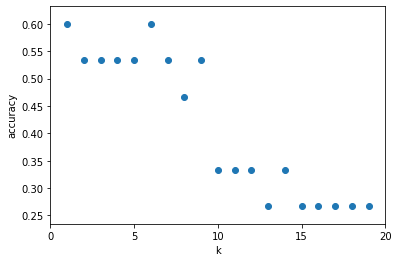

In [52]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How Sensitive our Knn Classifier is to the train_test_split proportion?

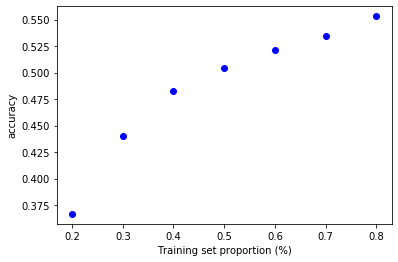

In [57]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]   # Train, test proportion

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');